<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




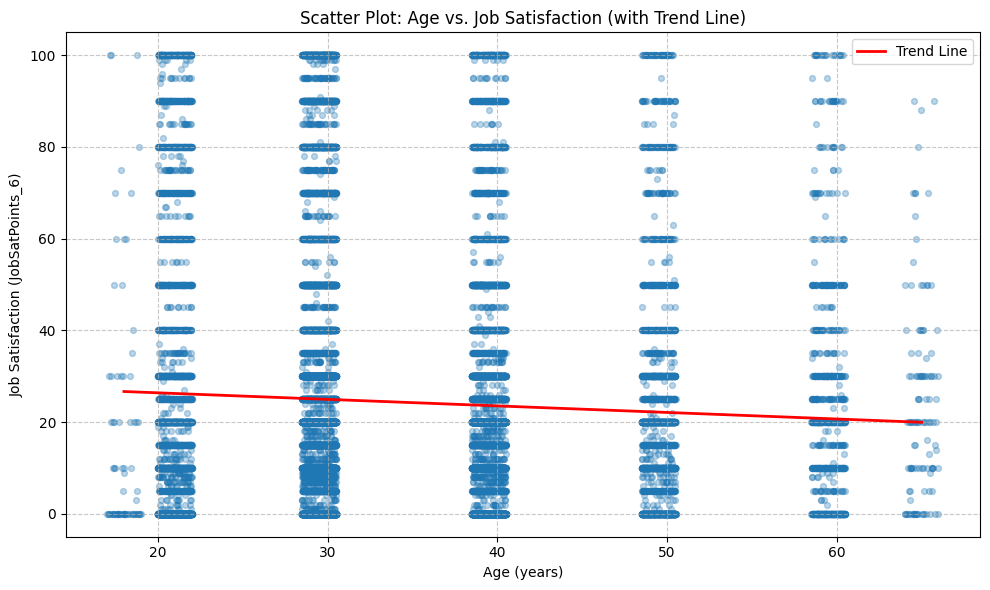

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Age to numeric midpoints for plotting
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_plot = df[['Age', 'JobSatPoints_6']].dropna()
df_plot['AgeNum'] = df_plot['Age'].apply(age_to_midpoint)

# Drop rows where AgeNum could not be determined
df_plot = df_plot.dropna(subset=['AgeNum'])

# Add jitter to AgeNum
jitter = np.random.uniform(-1, 1, size=len(df_plot))
df_plot['AgeJitter'] = df_plot['AgeNum'] + jitter

plt.figure(figsize=(10, 6))
plt.scatter(df_plot['AgeJitter'], df_plot['JobSatPoints_6'], alpha=0.3, s=18)

# Add a trend line
z = np.polyfit(df_plot['AgeNum'], df_plot['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(sorted(df_plot['AgeNum']), p(sorted(df_plot['AgeNum'])), color='red', linewidth=2, label='Trend Line')

plt.title('Scatter Plot: Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age (years)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


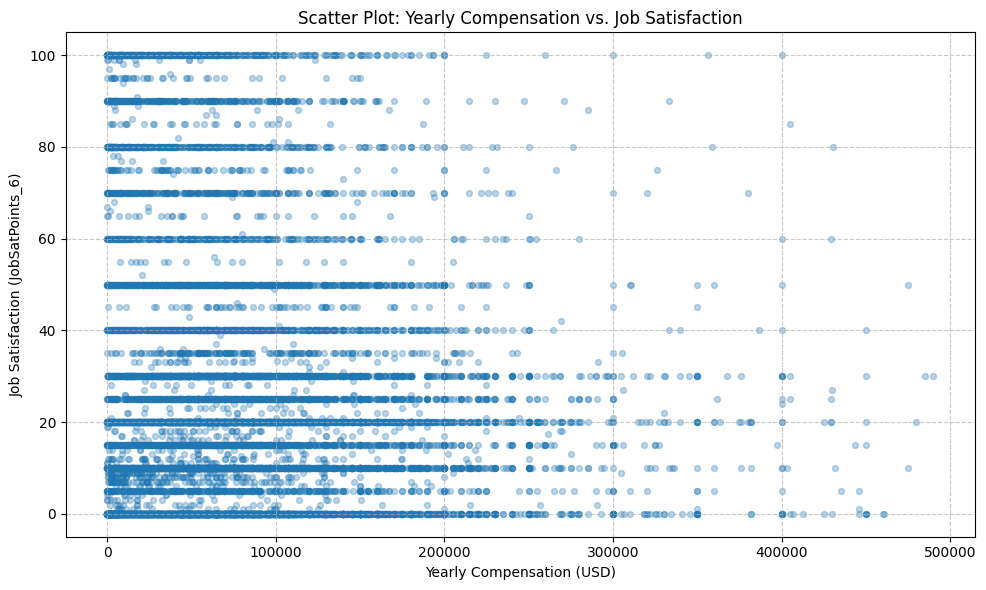

In [6]:
## Write your code here
import matplotlib.pyplot as plt

# Remove missing values for compensation and job satisfaction
df_comp = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Optionally, filter out extreme compensation values for better visualization
df_comp = df_comp[(df_comp['ConvertedCompYearly'] > 0) & (df_comp['ConvertedCompYearly'] < 500000)]

plt.figure(figsize=(10, 6))
plt.scatter(df_comp['ConvertedCompYearly'], df_comp['JobSatPoints_6'], alpha=0.3, s=18)
plt.title('Scatter Plot: Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


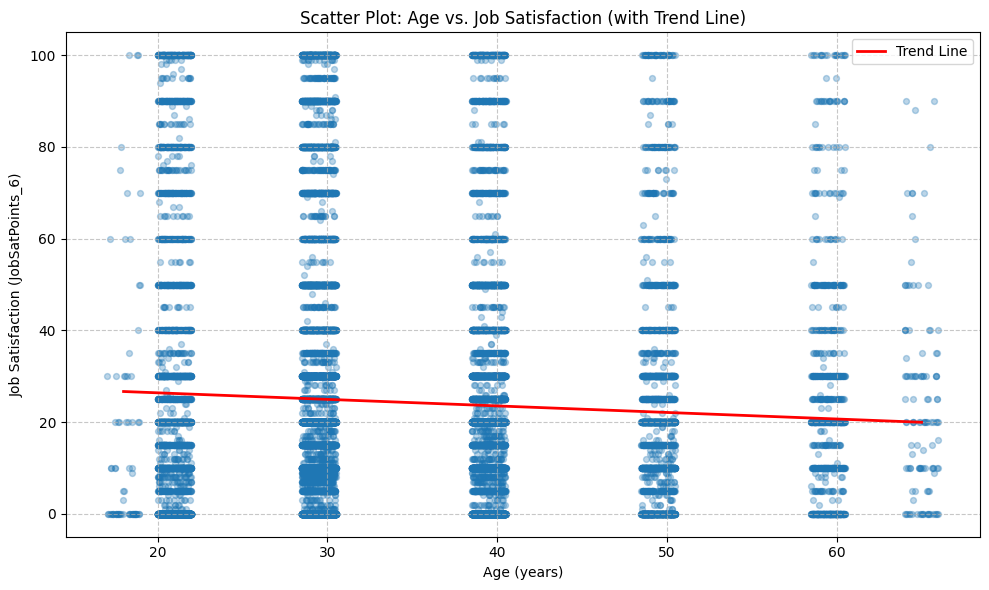

In [7]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Convert Age to numeric midpoints for plotting
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

df_plot = df[['Age', 'JobSatPoints_6']].dropna()
df_plot['AgeNum'] = df_plot['Age'].apply(age_to_midpoint)

# Drop rows where AgeNum could not be determined
df_plot = df_plot.dropna(subset=['AgeNum'])

# Add jitter to AgeNum for better visualization
jitter = np.random.uniform(-1, 1, size=len(df_plot))
df_plot['AgeJitter'] = df_plot['AgeNum'] + jitter

plt.figure(figsize=(10, 6))
plt.scatter(df_plot['AgeJitter'], df_plot['JobSatPoints_6'], alpha=0.3, s=18)

# Add a regression (trend) line
z = np.polyfit(df_plot['AgeNum'], df_plot['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(sorted(df_plot['AgeNum']), p(sorted(df_plot['AgeNum'])), color='red', linewidth=2, label='Trend Line')

plt.title('Scatter Plot: Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age (years)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


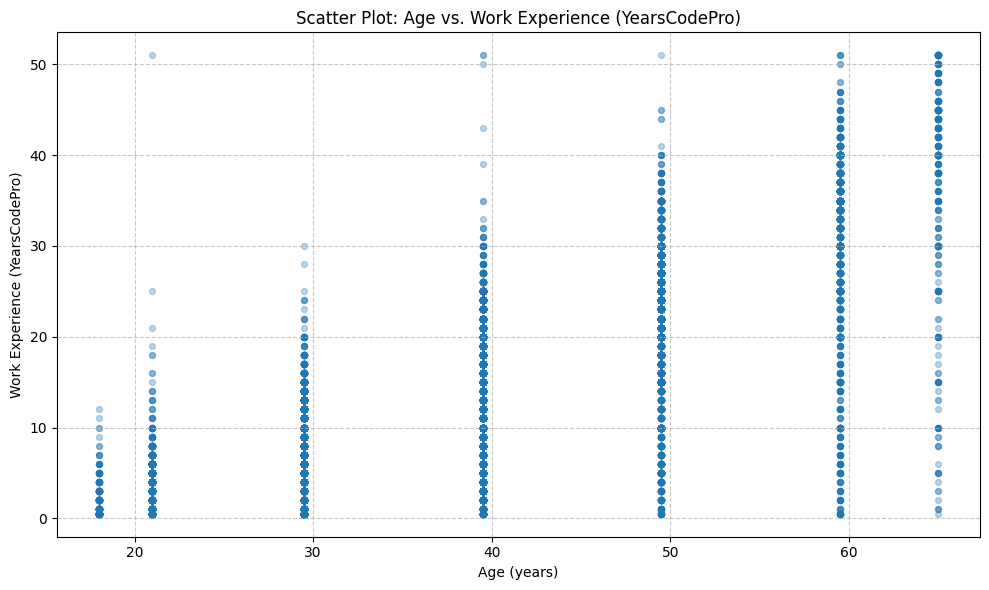

In [8]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Convert Age to numeric midpoints
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

# Convert YearsCodePro to numeric
def years_to_numeric(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.strip()
        if val.lower().startswith('less'):
            return 0.5
        if val.lower().startswith('more'):
            return 51
        try:
            return float(val)
        except:
            return np.nan
    return val

df_exp = df[['Age', 'YearsCodePro']].dropna()
df_exp['AgeNum'] = df_exp['Age'].apply(age_to_midpoint)
df_exp['YearsCodeProNum'] = df_exp['YearsCodePro'].apply(years_to_numeric)

# Drop rows with missing numeric values
df_exp = df_exp.dropna(subset=['AgeNum', 'YearsCodeProNum'])

plt.figure(figsize=(10, 6))
plt.scatter(df_exp['AgeNum'], df_exp['YearsCodeProNum'], alpha=0.3, s=18)
plt.title('Scatter Plot: Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age (years)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


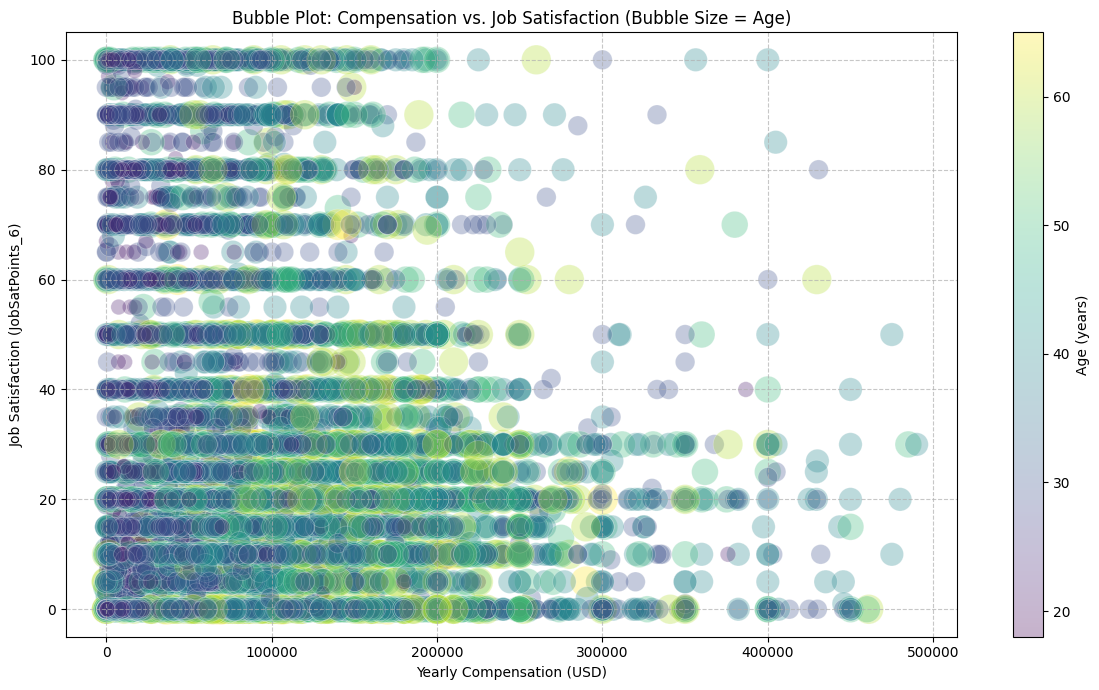

In [10]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Convert Age to numeric midpoints for bubble size
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

# Prepare data
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()
df_bubble = df_bubble[(df_bubble['ConvertedCompYearly'] > 0) & (df_bubble['ConvertedCompYearly'] < 500000)]
df_bubble['AgeNum'] = df_bubble['Age'].apply(age_to_midpoint)

# Drop rows with missing AgeNum
df_bubble = df_bubble.dropna(subset=['AgeNum'])

# Normalize age for bubble size (scale for better visibility)
sizes = (df_bubble['AgeNum'] - df_bubble['AgeNum'].min()) / (df_bubble['AgeNum'].max() - df_bubble['AgeNum'].min())
sizes = 100 + sizes * 400  # Bubble sizes between 100 and 500

plt.figure(figsize=(12, 7))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=sizes,
    alpha=0.3,
    c=df_bubble['AgeNum'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
cbar = plt.colorbar(label='Age (years)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


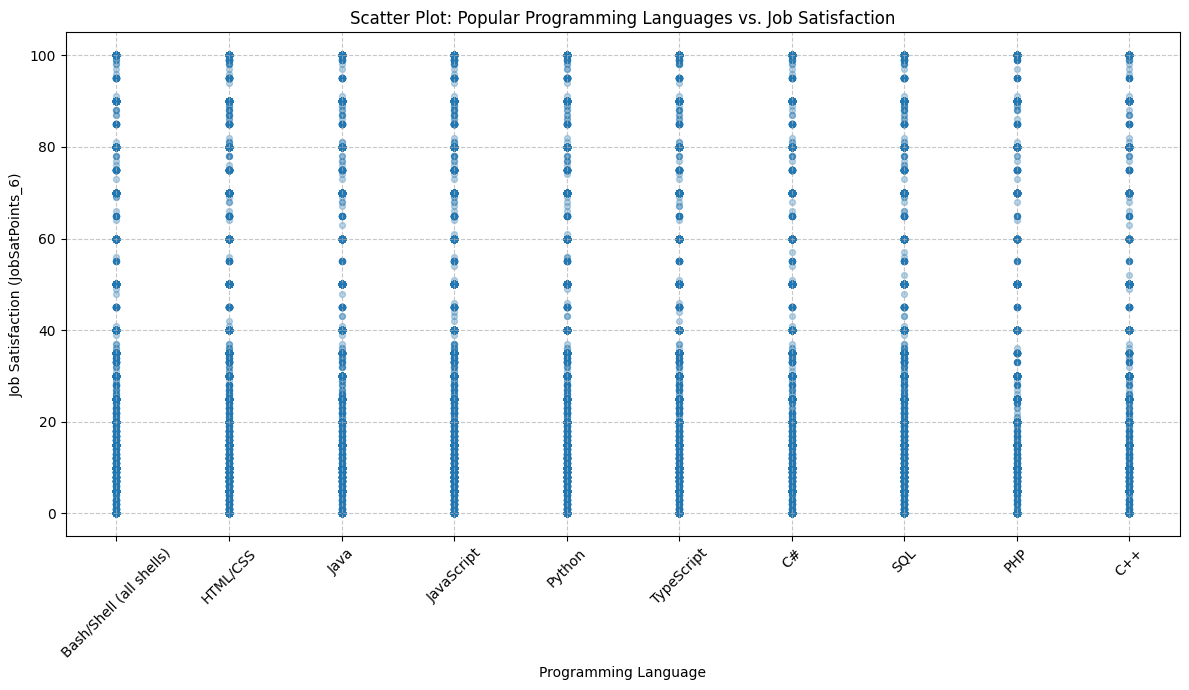

In [11]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Split languages and explode so each row is one language per respondent
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Remove leading/trailing spaces
df_lang['Language'] = df_lang['Language'].str.strip()

# Filter to most popular languages for clarity (top 10)
top_langs = df_lang['Language'].value_counts().nlargest(10).index
df_lang = df_lang[df_lang['Language'].isin(top_langs)]

plt.figure(figsize=(12, 7))
plt.scatter(df_lang['Language'], df_lang['JobSatPoints_6'], alpha=0.3, s=18)
plt.title('Scatter Plot: Popular Programming Languages vs. Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


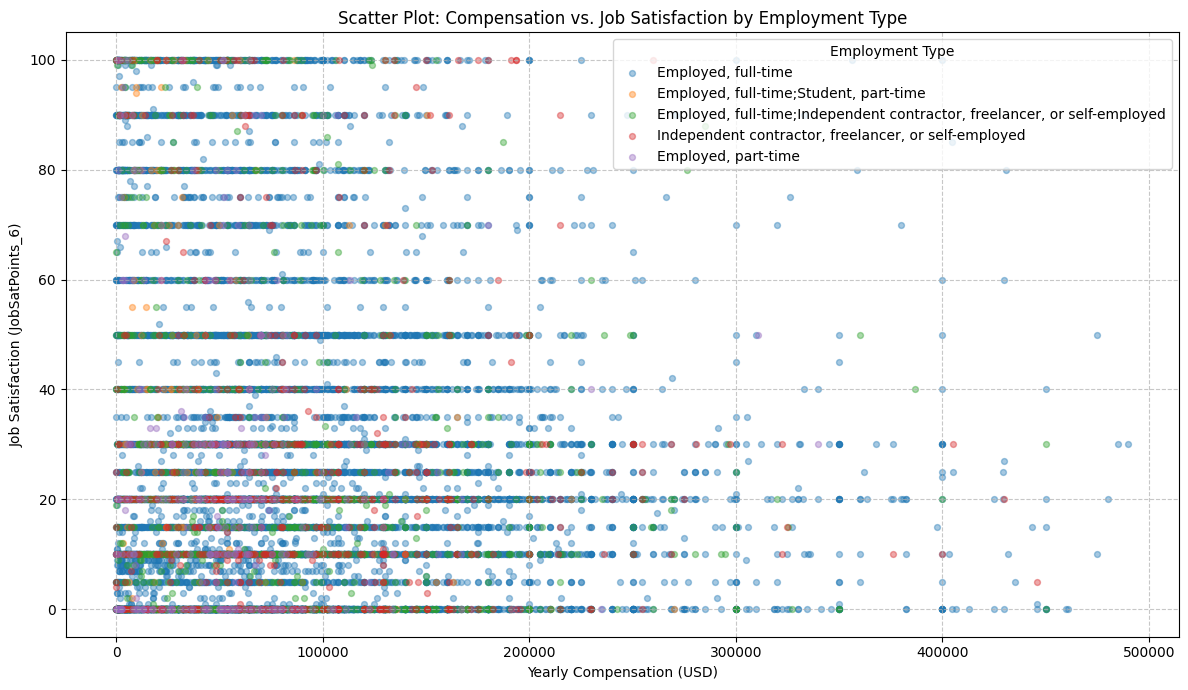

In [12]:
## Write your code here
import matplotlib.pyplot as plt

# Prepare data
df_emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()
df_emp = df_emp[(df_emp['ConvertedCompYearly'] > 0) & (df_emp['ConvertedCompYearly'] < 500000)]

# Get unique employment types (limit to top 5 for clarity)
top_employment = df_emp['Employment'].value_counts().nlargest(5).index
df_emp = df_emp[df_emp['Employment'].isin(top_employment)]

colors = plt.cm.tab10.colors
employment_types = df_emp['Employment'].unique()

plt.figure(figsize=(12, 7))
for i, emp_type in enumerate(employment_types):
    subset = df_emp[df_emp['Employment'] == emp_type]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.4,
        s=18,
        color=colors[i % len(colors)],
        label=emp_type
    )

plt.title('Scatter Plot: Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


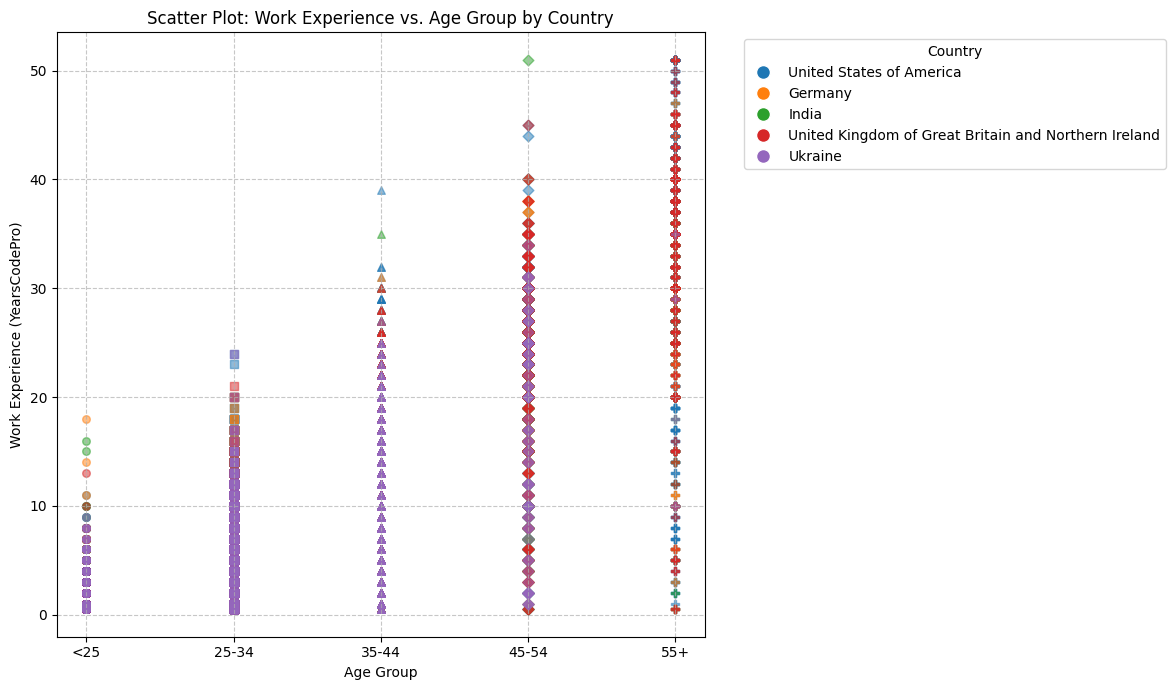

In [14]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Helper functions
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    if '-' in age_str:
        parts = age_str.split('-')
        return (int(parts[0]) + int(parts[1].split()[0])) / 2
    elif 'under' in age_str.lower():
        return 18
    elif 'older' in age_str.lower():
        return 65
    else:
        return np.nan

def years_to_numeric(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.strip()
        if val.lower().startswith('less'):
            return 0.5
        if val.lower().startswith('more'):
            return 51
        try:
            return float(val)
        except:
            return np.nan
    return val

# Prepare data
df_wc = df[['YearsCodePro', 'Age', 'Country']].dropna()
df_wc['YearsCodeProNum'] = df_wc['YearsCodePro'].apply(years_to_numeric)
df_wc['AgeMid'] = df_wc['Age'].apply(age_to_midpoint)

# Filter to top 5 countries for clarity
top_countries = df_wc['Country'].value_counts().nlargest(5).index
df_wc = df_wc[df_wc['Country'].isin(top_countries)]

# Use unique markers for age groups (binned)
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['<25', '25-34', '35-44', '45-54', '55+']
df_wc['AgeGroup'] = pd.cut(df_wc['AgeMid'], bins=age_bins, labels=age_labels, right=False)

markers = ['o', 's', '^', 'D', 'P']
colors = plt.cm.tab10.colors
plt.figure(figsize=(12, 7))

for i, country in enumerate(top_countries):
    for j, age_group in enumerate(age_labels):
        subset = df_wc[(df_wc['Country'] == country) & (df_wc['AgeGroup'] == age_group)]
        if not subset.empty:
            plt.scatter(
                [age_group]*len(subset),
                subset['YearsCodeProNum'],
                color=colors[i % len(colors)],
                marker=markers[j % len(markers)],
                alpha=0.5,
                s=30,
                label=f"{country} - {age_group}" if j == 0 else None
            )

# Custom legend for countries
handles = [plt.Line2D([0], [0], marker='o', color='w', label=country,
                      markerfacecolor=colors[i % len(colors)], markersize=10)
           for i, country in enumerate(top_countries)]
plt.legend(handles=handles, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot: Work Experience vs. Age Group by Country')
plt.xlabel('Age Group')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
